In this notebook, Upsampling with logistic regression is used.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Data Processing

In [13]:
df_train = pd.read_csv("2020_Competition_Training (1).csv")
df_train["train"] = 1
df_test = pd.read_csv("2020_Competition_Holdout .csv")
df_test["train"] = 0
df_test["transportation_issues"] = "NA"
df = pd.concat([df_train, df_test])
df.reset_index(inplace=True)
df.shape #87253 rows with 828 features

(87253, 828)

In [14]:
df_description = pd.read_excel("final for feature engineering_2.xls")
df_description = df_description[df_description["Target_col"]==1]


######This is for Neural Network#########################
nn_features = df_description["index"].tolist()+['train']
df = df[nn_features]
##########################################################


# new_features = df_description["Category"].unique().tolist()

# for x in ["important","leave","drop"]:
#     new_features.remove(x)
    
# #Get the important features and features left original.
# columns_important = df_description[df_description["Category"]=="important"]["index"].tolist()+["train"]
# columns_leave = df_description[df_description["Category"]=="leave"]["index"].tolist()

# #Sum all the values for desired features
# for feature in new_features:
#     original_features = df_description[df_description["Category"]==feature]["index"]
#     df[feature] = df[original_features].values.sum(axis=1)

In [15]:
# final_columns = new_features+columns_important+columns_leave
# df = df[final_columns]
# df.shape

### Missing Value

In [16]:
df_columns = df.columns.tolist()
df_columns.remove("transportation_issues")

#Columns with missing value
columns_with_missing = []
for column in df_columns:
    if df[column].isnull().sum()>0:
        columns_with_missing.append({"column":column, "missing":df[column].isnull().sum()})

df_missing_distribution = pd.DataFrame.from_dict(columns_with_missing)
df_missing_distribution.sort_values("missing",ascending=False).reset_index(inplace=True)
#df_missing_distribution.to_csv("missing_value.csv")
print(df_missing_distribution)


from sklearn.impute import SimpleImputer
# rank 1 blood fat screen or control
# rank 2 data from cons about demos
# rank 3 cms data insurance factor data.
imputer_frequent = SimpleImputer(strategy="most_frequent")
for column in df_missing_distribution["column"]:
    try:
        if df[column].nunique()>=30:
            df[column].fillna(df[column].mean(),inplace=True)
        else:
            df[column].fillna(df[column].value_counts().index[0],inplace=True)
    except:
        print(column)

                              column  missing
0              cms_ma_risk_score_nbr     4713
1            cms_partd_ra_factor_amt     4766
2              cms_ra_factor_type_cd     5270
3    cms_risk_adj_payment_rate_a_amt     4686
4    cms_risk_adj_payment_rate_b_amt     4689
..                               ...      ...
126              hedis_dia_hba1c_ge9     1360
127             hedis_dia_hba1c_test     1362
128          hedis_dia_ldc_c_control     1360
129           hedis_dia_ldc_c_screen     1360
130               hedis_dia_ma_nephr     1361

[131 rows x 2 columns]


In [17]:
#Rethink whether we should get dummies here.
#df = pd.get_dummies(df)
df = df.dropna(axis=1)

### Deal with Categorical Features and Split the data

In [18]:
type_df = pd.DataFrame(df.dtypes).reset_index()
category_features = type_df[type_df[0]=="object"]["index"].tolist()
for category_feature in category_features:
    print(category_feature)
    print (len(df[category_feature].unique()))
df[category_features]

cms_ra_factor_type_cd
9
cons_cmys
13
cons_hhcomp
13
cons_homstat
5
hedis_ami
2
hedis_cmc_ldc_c_control
2
hedis_cmc_ldc_c_screen
2
hedis_dia_eye
2
hedis_dia_hba1c_ge9
2
hedis_dia_hba1c_test
2
hedis_dia_ldc_c_control
2
hedis_dia_ldc_c_screen
2
hedis_dia_ma_nephr
2
lang_spoken_cd
3
mabh_seg
16
rucc_category
9
sex_cd
2
src_platform_cd
2
state_cd
31
transportation_issues
3


,cms_ra_factor_type_cd,cons_cmys,cons_hhcomp,cons_homstat,hedis_ami,hedis_cmc_ldc_c_control,hedis_cmc_ldc_c_screen,hedis_dia_eye,hedis_dia_hba1c_ge9,hedis_dia_hba1c_test,hedis_dia_ldc_c_control,hedis_dia_ldc_c_screen,hedis_dia_ma_nephr,lang_spoken_cd,mabh_seg,rucc_category,sex_cd,src_platform_cd,state_cd,transportation_issues
0,CN,4,B,Y,Y,N,Y,Y,N,N,N,N,Y,ENG,UNK,1-Metro,F,EM,other,0
1,CP,4,U,R,Y,N,Y,Y,N,N,N,Y,N,ENG,C2,2-Metro,F,EM,other,0
2,CN,6,C,R,Y,N,Y,Y,N,Y,Y,Y,Y,ENG,UNK,1-Metro,F,EM,other,1
3,CN,4,B,Y,Y,N,Y,Y,N,Y,Y,Y,Y,ENG,H6,7-Nonmetro,M,EM,other,0
4,CF,4,J,R,Y,N,Y,Y,N,N,Y,Y,Y,ENG,UNK,1-Metro,M,EM,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87248,CN,5,B,Y,Y,N,Y,Y,N,N,N,Y,Y,ENG,H7,1-Metro,M,EM,AZ,NA
87249,CN,3,J,Y,Y,N,N,Y,N,N,N,N,N,ENG,H3,2-Metro,M,LV,other,NA
87250,CN,4,B,Y,Y,N,Y,Y,N,N,N,N,Y,ENG,H1,3-Metro,F,LV,other,NA
87251,CN,4,U,P,Y,Y,Y,Y,N,N,Y,Y,Y,ENG,H2,1-Metro,F,EM,LA,NA


In [19]:
#Manipulate the object variables
df["cons_cmys"].loc[df["cons_cmys"]=='*'] =0
df["cons_cmys"].astype(int)
df["state_cd"].loc[df["state_cd"]!="Florida"] = "Others"
df.drop(["cons_hhcomp","mabh_seg"],axis=1,inplace=True)

In [20]:
df_train = df[df["train"]==1]
df_hold = df[df["train"]==0]

y = df_train["transportation_issues"]
y = y.astype("int")
x = df_train
x.drop("transportation_issues",axis=1,inplace=True)

In [21]:
print(x.shape)

(69572, 486)


In [22]:
x = pd.get_dummies(x)

In [23]:
x.shape

(69572, 530)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Feature Engineering

## Sampling

### SMOTE Upsampling

In [25]:
# #This code is not fixed because there are "strings" which SMOTE does not handle.
# #I use SMOTE after the get_dummies, not sure why it throws an error.
# from imblearn.over_sampling import SMOTE 
# smote_sample = SMOTE()

# x_train, y_train = smote_sample.fit_resample(x_train, y_train)

# x_train.drop("transportation_issues",axis=1, inplace=True)
# x_test.drop("transportation_issues",axis=1, inplace=True)
# x_train = pd.get_dummies(x_train) 
# x_test = pd.get_dummies(x_test)
# x_train,x_test = x_train.align(x_test, join="left", axis=1)

### Upsampling

In [26]:
from sklearn.utils import resample
X = x_train.copy()
X["transportation_issues"] = y_train
# separate minority and majority classes
wo_tran = X[X["transportation_issues"]==0]
tran = X[X["transportation_issues"]==1]

# upsample minority
tran_upsampled = resample(tran,
                          replace=True, # sample with replacement
                          n_samples=len(wo_tran), # match number in majority class
                          random_state=1) # reproducible results

upsampled = pd.concat([wo_tran,tran_upsampled])

# check new class counts
upsampled["transportation_issues"].value_counts()

y_train = upsampled["transportation_issues"]
x_train = upsampled.drop("transportation_issues",axis=1)
x_train = pd.get_dummies(x_train)

x_test = pd.get_dummies(x_test)
x_train,x_test = x_train.align(x_test, join="left", axis=1)

### Down Sampling

In [27]:
# from sklearn.utils import resample
# X = x_train.copy()
# X["transportation_issues"] = y_train
# # separate minority and majority classes
# wo_tran = X[X["transportation_issues"]==0]
# tran = X[X["transportation_issues"]==1]
 
# # Downsample majority class
# df_majority_downsampled = resample(wo_tran, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=len(tran),     # to match minority class
#                                  random_state=42) # reproducible results
 
# # Combine minority class with downsampled majority class
# downsampled = pd.concat([df_majority_downsampled, tran])
 
# # Display new class counts
# downsampled["transportation_issues"].value_counts()

# y_train = downsampled["transportation_issues"]
# x_train = downsampled.drop("transportation_issues",axis=1)
# x_train = pd.get_dummies(x_train)

# x_test.drop("transportation_issues",axis=1, inplace=True)
# x_test = pd.get_dummies(x_test)
# x_train,x_test = x_train.align(x_test, join="left", axis=1)

## Scaling & Clustering

### Polynomial Features

In [28]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(interaction_only=True,include_bias = False,degree=2)
# x_train = poly.fit_transform(x_train)
# x_test = poly.fit_transform(x_test)

In [29]:
print(x_train.shape, x_test.shape)

(83072, 530) (20872, 530)


### Scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
# Scale the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### PCA

In [31]:
# from sklearn.decomposition import PCA
# #PCA Dimension Reduction
# pca = PCA(n_components=20)
# # prepare transform on dataset
# x_train = pca.fit_transform(x_train)
# x_test[np.isnan(x_test)] = 0 #Fill the na value for logistic regression
# x_test = pca.fit_transform(x_test)

### TSNE

In [32]:
# from sklearn.manifold import TSNE
# x_train = TSNE(n_components=3).fit_transform(x_train) #change the n components.
# x_test[np.isnan(x_test)] = 0 #Fill the na value for logistic regression
# x_test = TSNE(n_components=3).fit_transform(x_test) #change the n components.

## Function

In [33]:
def roc_plot(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

## Model

### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = "lbfgs",random_state=42).fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [35]:
y_prob = clf.predict_proba(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
(y_test==y_pred).mean() #accuracy 86.87%

#False negative values are larger than the false positive values.

[[13021  4818]
 [ 1148  1885]]


0.7141625143733231

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6757072320327436

ROC_AUC Score:
0.6757072320327436


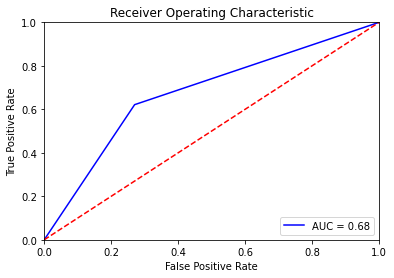

In [38]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

print("ROC_AUC Score:")
print(roc_auc_score(y_test, y_pred))

#ROC Plot
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_plot(fpr, tpr, roc_auc)

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
model.add(Dense(32, activation='relu')) # Hidden 2
model.add(Dense(16,activation='sigmoid')) #Hidden 3
model.add(Dense(1)) # Output
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
monitor = EarlyStopping(monitor='loss', min_delta=1e-1, 
                        patience=10, verbose=1, mode='auto', 
                        restore_best_weights=True)
model.fit(x_train,y_train,callbacks=[monitor],verbose=2,epochs=100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 4s - loss: 0.6121 - acc: 0.6708
Epoch 2/100
 - 4s - loss: 0.5972 - acc: 0.6845
Epoch 3/100
 - 4s - loss: 0.5973 - acc: 0.6843
Epoch 4/100
 - 4s - loss: 0.5869 - acc: 0.6949
Epoch 5/100
 - 4s - loss: 0.5812 - acc: 0.6976
Epoch 6/100
 - 4s - loss: 0.5689 - acc: 0.7056
Epoch 7/100
 - 4s - loss: 0.5564 - acc: 0.7156
Epoch 8/100
 - 4s - loss: 0.5492 - acc: 0.7206
Epoch 9/100
 - 4s - loss: 0.5370 - acc: 0.7304
Epoch 10/100
 - 4s - loss: 0.5211 - acc: 0.7404
Epoch 11/100
Restoring model weights from the end of the best epoch.
 - 4s - loss: 0.5454 - acc: 0.7277
Epoch 00011: early stopping


[[13013  4826]
 [ 1134  1899]]
0.6777909501454071


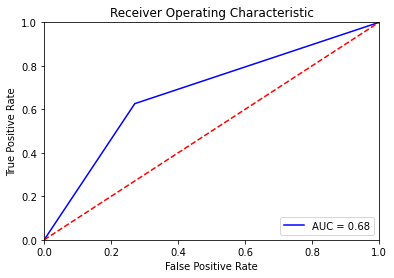

In [40]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


y_pred = model.predict_classes(x_test)
y_prob = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test, y_pred))

#ROC Plot
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_plot(fpr, tpr, roc_auc)

In [46]:
#Neural Network Accuracy:
(13013+1899)/(13013+1899+4826+1134)

0.7144499808355692

In [47]:
from xgboost import XGBClassifier

model = XGBClassifier(
        n_estimators=2000,
        max_depth=3, 
        learning_rate=0.02)

xgboost_model = model.fit(x_train, y_train)
y_pred = xgboost_model.predict(x_test)

[[13670  4169]
 [ 1298  1735]]
0.6691697214749348


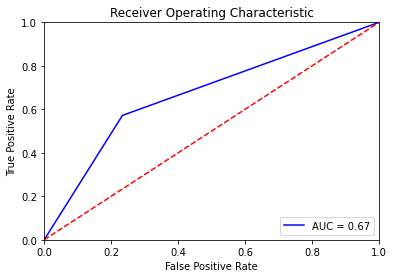

In [48]:
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test, y_pred))

#ROC Plot
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
roc_plot(fpr, tpr, roc_auc)

In [49]:
(13670+1735)/(13670+1735+4169+1298)

0.7380701418167881